# LAB7: Programowanie sieciowe – algorytmy CPM, PERT

# Zadanie 1
Realizacja algorytmu PERT:

In [36]:
inf = float('inf')
graph = {
    1 : [2,3],
    2: [4,5],
    3: [4],
    4: [5],
    5: [],
}
prevs = {
    1 : [],
    2: [1],
    3: [1],
    4: [2,3],
    5: [2,4],
}

a = [
    [inf, 13, 12, inf, inf],
    [inf, inf, inf, 2, 15],
    [inf, inf, inf, 8, inf],
    [inf, inf, inf, inf, 2],
    [inf, inf, inf, inf, inf],
    
]

def PERT(graph, s, l):
    Pw = {}
    Kp = {key: 100000 for key in list(graph.keys())[::-1]}
    Zn = {}
    Zc = {}
    Zs = {}
    
    #forward Pw 
    for u in graph:
        if u != s:
            Pw[u] = max([Pw[v]+ a[v-1][u-1] for v in prevs[u]])
        else:
            Pw[u] = 0

    #backward Kp
    Kp[l] = Pw[l]
    for u in list(graph.keys())[::-1]:
        for v in prevs[u]:
            Kp[v] = min(Kp[v], Kp[u] - a[v-1][u-1])

    EST = {}
    EFT = {}
    LST = {}
    LFT = {}
    duration = {}
    visited = []
    Q = [s]
    while Q:
        v = Q.pop(0)
        if v not in visited:
            visited.append(v)
            for u in graph[v]:
                duration[(v,u)] = a[v-1][u-1]
                EST[(v,u)] = Pw[v]
                LFT[(v,u)] = Kp[u]
                EFT[(v,u)] = EST[(v,u)] + duration[(v,u)] 
                LST[(v,u)] = LFT[(v,u)] - duration[(v,u)] 
                Zc[(v,u)] = LFT[(v,u)] - EFT[(v,u)]
                Q.append(u)
    
    #reconstruct critical paths
    Zc_c = Zc.copy()
    copied = Zc.copy()
    crit_path = []
    visited = []
    next = 1
    while copied:
        path = []
        Zc_c = copied.copy()
        for task in Zc_c:
            if Zc_c[task] == 0:
                if next not in visited and next == task[0]:   
                    path.append(task[0])
                    next = task[1]
                    copied.pop(task)
            else:
                copied.pop(task)
        path.append(next)
        if crit_path:
            path.append(*crit_path[0][crit_path[0].index(next)+1:])
        crit_path.append(path)
        next = 1       
    
    
    return crit_path, Kp[l], EST, LFT, EFT, LST, Zc, duration

crit_path, date, Pw, Kp, Kw, Pp, Zc, duration = PERT(graph, 1, 5)
_ = PERT(graph, 1, 5)

In [1]:
# graph = {
#     'S': {'prev': [], 'time': 0},
#     'A': {'prev': ['S'], 'time': 7},
#     'B': {'prev': ['S'], 'time': 9},
#     'C': {'prev': ['A'], 'time': 12},
#     'D': {'prev': ['A', 'B'], 'time': 8},
#     'E': {'prev': ['D'], 'time': 9},
#     'F': {'prev': ['C', 'E'], 'time': 6},
#     'G': {'prev': ['E'], 'time': 5},
#     'END': {'prev': ['F', 'G'], 'time': 4}
# }

# final = {
#     'S': {'prev': [], 'time': 0},
#     'A': {'prev': ['S'], 'time': {'S' : 7}},
#     'B': {'prev': ['S'], 'time': {'S' : 9}},
#     'C': {'prev': ['A'], 'time': {S}},
#     'D': {'prev': ['A', 'B'], 'time': 8},
#     'E': {'prev': ['D'], 'time': 9},
#     'F': {'prev': ['C', 'E'], 'time': 6},
#     'G': {'prev': ['E'], 'time': 5},

# }

# graph = {
#     1 : {'prev': [], 'time': {0:0}},
#     2: {'prev': [1], 'time': {1: 5}},
#     3: {'prev': [1], 'time': {1: 9}},
#     4: {'prev': [1], 'time': {1: 12}},
#     5: {'prev': [2,3], 'time': {2: 2, 3:0}},
#     6: {'prev': [3], 'time': {3: 2}},
#     7: {'prev': [4,5,6], 'time': {4: 3, 5:7, 6:2}},
# }

graph = {
    1 : {'prev': [], 'time': {0:0}},
    2: {'prev': [1], 'time': {1: 8}},
    3: {'prev': [1], 'time': {1: 4}},
    4: {'prev': [1,2], 'time': {1: 2, 2:4}},
    5: {'prev': [2], 'time': {2: 4}},
    6: {'prev': [3,4], 'time': {3: 13, 4:5}},
    7: {'prev': [5,6], 'time': {5:3, 6:5}},
}

# graph = {
#     'a': {'prev': [], 'time': 10},
#     'b': {'prev': [], 'time': 8},
#     'c': {'prev': ['a'], 'time': 12},
#     'd': {'prev': ['a', 'b'], 'time': 5},
#     'e': {'prev': ['b'], 'time': 7},
#     'f': {'prev': ['c', 'd'], 'time': 15},
#     'g': {'prev': ['f'], 'time': 13},
#     'h': {'prev': ['e'], 'time': 8},

# }

# graph = {
#     'a': {'prev': [], 'time': 5},
#     'b': {'prev': ['a'], 'time': 3},
#     'c': {'prev': ['b'], 'time': 9},
#     'd': {'prev': ['b'], 'time': 5},
#     'e': {'prev': ['c'], 'time': 9},
#     'f': {'prev': ['c', 'd'], 'time': 3},
#     'g': {'prev': ['e', 'f', 'd'], 'time': 2},
#     'h': {'prev': ['g', 'd'], 'time': 2},

# }

def PERT(graph, s, l):
    Pw = {}
    Pp = {key: 100000 for key in list(graph.keys())[::-1]}
    Kw = {}
    Kp = {key: 100000 for key in list(graph.keys())[::-1]}
    Zn = {}
    Zc = {}
    Zs = {}
    t_o = {}
    visited = []
    #forward Pw, Kw  
    for u in graph:
        if graph[u]['prev']:
            Pw[u] = max([Kw[x] for x in graph[u]['prev']])
            # Kw[u] = Pw[u] + graph[u]['time']
            Kw[u] = max([Kw[v]+graph[u]['time'][v] for v in graph[u]['prev']])
        else:
            Pw[u] = 0
            Kw[u] = 0
    print(Pw)
    print(Kw)

    Kp[l] = Kw[l]
    # Pp[l] = Kp[l] - graph[l]['time']
    
    #backward Pp, Kp
    for u in list(graph.keys())[::-1]:
        # print(u)
        for v in graph[u]['prev']:
            Kp[v] = min(Kp[v], Kp[u] - graph[u]['time'][v])
            # Pp[v] = Kp[v] - graph[v]['time'][v]
        
    print(Kp)    
    #Zets -> critital acts
    crit_path = []
    slack = {}
    for u in list(graph.keys())[::-1]:
        Zc[u] = []
        for v in graph[u]['prev']:
            Zc[u].append((v, Kp[u] - Kw[v] - graph[u]['time'][v]))
        if Zc[u]:
            slack[u] = min([w[1] for w in Zc[u]])
        else:
            slack[u] = 0
        # Zn[u] =  - Kw[u]
        # Zs[u] = 

        # slacktime = 999999999999999999999
        # for node in graph[u]['prev']:
        #     slacktime = min(slacktime, Zc[node])
        # if not graph[u]['prev']:
        #     slack[u] = 0
        # else:
        #     slack[u] = slacktime
        

        # if Zc[u][] == 0:
        #     crit_path.append(u)
    print(Zc, slack)
    vert = l
    crit_path.append(l)
    while True:
        print(vert)
        if Zc[vert]:
            for u in Zc[vert]:
                if u[1] == 0:
                    crit_path.append(u[0])
                    vert = u[0]
                    break
        else:
            break
    
    return crit_path, Kw[l], Pw, Kp, Zc, Pp, Kw, slack

duration = {key: graph[key]['time'] for key in graph.keys()}
crit_path, date, Pw, Kp, Zc, Pp, Kw, slack = PERT(graph, 1, 7)
print(crit_path)

{1: 0, 2: 0, 3: 0, 4: 8, 5: 8, 6: 12, 7: 17}
{1: 0, 2: 8, 3: 4, 4: 12, 5: 12, 6: 17, 7: 22}
{7: 22, 6: 17, 5: 19, 4: 12, 3: 4, 2: 8, 1: 0}
{7: [(5, 7), (6, 0)], 6: [(3, 0), (4, 0)], 5: [(2, 7)], 4: [(1, 10), (2, 0)], 3: [(1, 0)], 2: [(1, 0)], 1: []} {7: 0, 6: 0, 5: 7, 4: 0, 3: 0, 2: 0, 1: 0}
7
6
3
1
[7, 6, 3, 1]


In [ ]:
# graph = {
#     'S': {'prev': [], 'time': 0},
#     'A': {'prev': ['S'], 'time': 7},
#     'B': {'prev': ['S'], 'time': 9},
#     'C': {'prev': ['A'], 'time': 12},
#     'D': {'prev': ['A', 'B'], 'time': 8},
#     'E': {'prev': ['D'], 'time': 9},
#     'F': {'prev': ['C', 'E'], 'time': 6},
#     'G': {'prev': ['E'], 'time': 5},
#     'END': {'prev': ['F', 'G'], 'time': 4}
# }

# final = {
#     'S': {'prev': [], 'time': 0},
#     'A': {'prev': ['S'], 'time': {'S' : 7}},
#     'B': {'prev': ['S'], 'time': {'S' : 9}},
#     'C': {'prev': ['A'], 'time': {S}},
#     'D': {'prev': ['A', 'B'], 'time': 8},
#     'E': {'prev': ['D'], 'time': 9},
#     'F': {'prev': ['C', 'E'], 'time': 6},
#     'G': {'prev': ['E'], 'time': 5},

# }

graph = {
    1 : {'prev': [], 'time': {0:0}},
    2: {'prev': [1], 'time': {1: 5}},
    3: {'prev': [1], 'time': {1: 9}},
    4: {'prev': [1], 'time': {1: 12}},
    5: {'prev': [2,3], 'time': {2: 2, 3:0}},
    6: {'prev': [3], 'time': {3: 2}},
    7: {'prev': [4,5,6], 'time': {4: 3, 5:7, 6:2}},
}

# graph = {
#     'a': {'prev': [], 'time': 10},
#     'b': {'prev': [], 'time': 8},
#     'c': {'prev': ['a'], 'time': 12},
#     'd': {'prev': ['a', 'b'], 'time': 5},
#     'e': {'prev': ['b'], 'time': 7},
#     'f': {'prev': ['c', 'd'], 'time': 15},
#     'g': {'prev': ['f'], 'time': 13},
#     'h': {'prev': ['e'], 'time': 8},

# }

# graph = {
#     'a': {'prev': [], 'time': 5},
#     'b': {'prev': ['a'], 'time': 3},
#     'c': {'prev': ['b'], 'time': 9},
#     'd': {'prev': ['b'], 'time': 5},
#     'e': {'prev': ['c'], 'time': 9},
#     'f': {'prev': ['c', 'd'], 'time': 3},
#     'g': {'prev': ['e', 'f', 'd'], 'time': 2},
#     'h': {'prev': ['g', 'd'], 'time': 2},

# }

def PERT(graph, s, l):
    Pw = {}
    Pp = {key: 100000 for key in list(graph.keys())[::-1]}
    Kw = {}
    Kp = {key: 100000 for key in list(graph.keys())[::-1]}
    Zn = {}
    Zc = {}
    Zs = {}
    t_o = {}
    visited = []
    #forward Pw, Kw  
    for u in graph:
        print(u)
        if graph[u]['prev']:
            Pw[u] = max([Kw[x] for x in graph[u]['prev']])
            # Kw[u] = Pw[u] + graph[u]['time']
        else:
            Pw[u] = 0
        Kw[u] = Pw[u] + max(list(graph[u]['time'].values()))
    print(Pw)
    print(Kw)

    Kp[l] = Kw[l]
    Pp[l] = Kp[l] - graph[l]['time']
    
    #backward Pp, Kp
    for u in list(graph.keys())[::-1]:
        for v in graph[u]['prev']:
            Kp[v] = min(Pp[u], Kp[v])
            Pp[v] = Kp[v] - graph[v]['time']
            
    #Zets -> critital acts
    crit_path = []
    slack = {}
    for u in graph:
        Zc[u] = Kp[u] - Kw[u]
        # Zn[u] =  - Kw[u]
        # Zs[u] = 

        slacktime = 999999999999999999999
        for node in graph[u]['prev']:
            slacktime = min(slacktime, Zc[node])
        if not graph[u]['prev']:
            slack[u] = 0
        else:
            slack[u] = slacktime
        

        if Zc[u] == 0:
            crit_path.append(u)
    # print(slack, Zc)
    
    return crit_path, Kw[l], Pw, Kp, Zc, Pp, Kw

duration = {key: graph[key]['time'] for key in graph.keys()}
crit_path, date, Pw, Kp, Zc, Pp, Kw = PERT(graph, 's', 7)
print(crit_path)

In [145]:
graph = {
    # 'S': {'prev': [], 'time': 8},
    'A': {'prev': ['S'], 'time': 7},
    'B': {'prev': ['S'], 'time': 9},
    'C': {'prev': ['A'], 'time': 12},
    'D': {'prev': ['A', 'B'], 'time': 8},
    'E': {'prev': ['D'], 'time': 9},
    'F': {'prev': ['C', 'E'], 'time': 6},
    'G': {'prev': ['E'], 'time': 5},
    # 'END': {'prev': ['F', 'G'], 'time': 4}
}

final = {
    'S': {'prev': [], 'time': 0},
    'A': {'prev': ['S'], 'time': 7},
    'B': {'prev': ['S'], 'time': 9},
    'C': {'prev': ['A'], 'time': 12},
    'D': {'prev': ['A', 'B'], 'time': 8},
    'E': {'prev': ['D'], 'time': 9},
    'F': {'prev': ['C', 'E'], 'time': 6},
    'G': {'prev': ['E'], 'time': 5},

}

# graph = {
#     'a': {'prev': [], 'time': 10},
#     'b': {'prev': [], 'time': 8},
#     'c': {'prev': ['a'], 'time': 12},
#     'd': {'prev': ['a', 'b'], 'time': 5},
#     'e': {'prev': ['b'], 'time': 7},
#     'f': {'prev': ['c', 'd'], 'time': 15},
#     'g': {'prev': ['f'], 'time': 13},
#     'h': {'prev': ['e'], 'time': 8},

# }

# graph = {
#     'a': {'prev': [], 'time': 5},
#     'b': {'prev': ['a'], 'time': 3},
#     'c': {'prev': ['b'], 'time': 9},
#     'd': {'prev': ['b'], 'time': 5},
#     'e': {'prev': ['c'], 'time': 9},
#     'f': {'prev': ['c', 'd'], 'time': 3},
#     'g': {'prev': ['e', 'f', 'd'], 'time': 2},
#     'h': {'prev': ['g', 'd'], 'time': 2},

# }

def PERT(graph, s, l):
    Pw = {}
    Pp = {key: 100000 for key in list(graph.keys())[::-1]}
    Kw = {}
    Kp = {key: 100000 for key in list(graph.keys())[::-1]}
    Zn = {}
    Zc = {}
    Zs = {}
    t_o = {}
    visited = []
    #forward Pw, Kw  
    for u in graph:
        if graph[u]['prev']:
            Pw[u] = max([Kw[x] for x in graph[u]['prev']])
            Kw[u] = Pw[u] + graph[u]['time']
        else:
            Pw[u] = 0
            Kw[u] = 0
    
    Pp[l] = Pw[l]
    Kp[l] = Pw[l]
    #backward Pp, Kp
    for u in list(graph.keys())[::-1]:
        for v in graph[u]['prev']:
            Kp[v] = min(Pp[u], Kp[v])
            Pp[v] = Kp[v] - graph[v]['time']
            
    #Zets -> critital acts
    crit_path = []
    for u in graph:
        Zc[u] = Kw[u] - [u]
        # Zn[u] =  - Kw[u]
        # Zs[u] = 
        if Zc[u] == 0:
            crit_path.append(u)
    
    return crit_path, Kw[l], Pw, Kp, Zc, Pp, Kw

duration = {key: graph[key]['time'] for key in graph.keys()}
crit_path, date, Pw, Kp, Zc, Pp, Kw = PERT(graph, 'a', 'h')




KeyError: 'S'

{(1, 2): 0, (1, 3): 0, (2, 4): 13, (2, 5): 13, (3, 4): 12, (4, 5): 20}
{(1, 2): 0, (1, 3): 6, (2, 4): 24, (2, 5): 13, (3, 4): 18, (4, 5): 26}
{(1, 2): 13, (1, 3): 18, (2, 4): 26, (2, 5): 28, (3, 4): 26, (4, 5): 28}
{(1, 2): 13, (1, 3): 12, (2, 4): 15, (2, 5): 28, (3, 4): 20, (4, 5): 22}
{(1, 2): 0, (1, 3): 6, (2, 4): 11, (2, 5): 0, (3, 4): 6, (4, 5): 6}


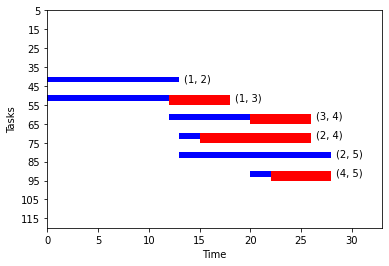

In [42]:
import matplotlib.pyplot as plt
def make_gantt_chart(graph, startTimes, completionTimes, durations, slackTimes):
    
    fig, ax = plt.subplots()
    y_values = sorted(startTimes.keys(), key = lambda x: startTimes[x])
    y_start = 40
    y_height = 5
    for value in y_values:
        ax.broken_barh([(startTimes[value], durations[value])], (y_start, y_height-2), facecolors = 'blue')
        ax.broken_barh([(completionTimes[value], slackTimes[value])], (y_start, y_height), facecolors = 'red')
        ax.text(completionTimes[value] + slackTimes[value] + 0.5,y_start + y_height/2, value)
        y_start += 10
    ax.set_xlim(0, max(completionTimes.values()) + 5)
    ax.set_ylim(len(durations)*20)
    ax.set_xlabel('Time')
    ax.set_ylabel('Tasks')
    i = 5
    y_ticks = []
    y_ticklabels = []
    while i < len(durations)*20:    
        y_ticks.append(i)
        i += 10
    ax.set_yticks(y_ticks)
    plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',         # ticks along the top edge are off
    labelleft='off') # labels along the bottom edge are off
    plt.savefig('gantt.png', bbox_inches = 'tight')
    plt.show()
print(Pw)
print(Pp)
print(Kp)
print(Kw)
print(Zc)
make_gantt_chart(graph, Pw, Kw, duration, Zc)

In [115]:
graph = {
    'S': {'prev': [], 'time': 8},
    'A': {'prev': ['S'], 'time': 7},
    'B': {'prev': ['S'], 'time': 9},
    'C': {'prev': ['A'], 'time': 12},
    'D': {'prev': ['A', 'B'], 'time': 8},
    'E': {'prev': ['D'], 'time': 9},
    'F': {'prev': ['C', 'E'], 'time': 6},
    'G': {'prev': ['E'], 'time': 5},
    'END': {'prev': ['F', 'G'], 'time': 4}
}

final = {
    'S': {'prev': [], 'time': 0},
    'A': {'prev': ['S'], 'time': 7},
    'B': {'prev': ['S'], 'time': 9},
    'C': {'prev': ['A'], 'time': 12},
    'D': {'prev': ['A', 'B'], 'time': 8},
    'E': {'prev': ['D'], 'time': 9},
    'F': {'prev': ['C', 'E'], 'time': 6},
    'G': {'prev': ['E'], 'time': 5},

}

graph = {
    'a': {'prev': [], 'time': 10},
    'b': {'prev': [], 'time': 8},
    'c': {'prev': ['a'], 'time': 12},
    'd': {'prev': ['a', 'b'], 'time': 5},
    'e': {'prev': ['b'], 'time': 7},
    'f': {'prev': ['c', 'd'], 'time': 15},
    'g': {'prev': ['f'], 'time': 13},
    'h': {'prev': ['e'], 'time': 8},

}

graph = {
    'a': {'prev': [], 'time': 5},
    'b': {'prev': ['a'], 'time': 3},
    'c': {'prev': ['b'], 'time': 9},
    'd': {'prev': ['b'], 'time': 5},
    'e': {'prev': ['c'], 'time': 9},
    'f': {'prev': ['c', 'd'], 'time': 3},
    'g': {'prev': ['e', 'f', 'd'], 'time': 2},
    'h': {'prev': ['g', 'd'], 'time': 2},

}

def PERT(graph, s, l):
    Pw = {}
    Pp = {key: 100000 for key in list(graph.keys())[::-1]}
    Kw = {}
    Kp = {key: 100000 for key in list(graph.keys())[::-1]}
    Zn = {}
    Zc = {}
    Zs = {}
    t_o = {}
    visited = []
    #forward Pw, Kw  
    for u in graph:
        if graph[u]['prev']:
            Pw[u] = max([Kw[x] for x in graph[u]['prev']])
            Kw[u] = Pw[u] + graph[u]['time']
        else:
            Pw[u] = 0
            Kw[u] = Pw[u] + graph[u]['time']
    
    Pp[l] = Kw[l]
    Kp[l] = Kw[l]
    #backward Pp, Kp
    for u in list(graph.keys())[::-1]:
        for v in graph[u]['prev']:
            Kp[v] = min(Pp[u], Kp[v])
            Pp[v] = Kp[v] - graph[v]['time']
            
    #Zets -> critital acts
    crit_path = []
    for u in graph:
        Zc[u] = Kp[u] - Kw[u]
        # Zn[u] =  - Kw[u]
        # Zs[u] = 
        if Zc[u] == 0:
            crit_path.append(u)
    
    return crit_path, Kw[l], Pw, Kp, Zc, Pp, Kw

duration = {key: graph[key]['time'] for key in graph.keys()}
crit_path, date, Pw, Kp, Zc, Pp, Kw = PERT(graph, 'a', 'h')




# Zadanie 2


# Zadanie 3